# HW2 - Data Analysis
### Dvir Yerushalmi 201271251
### Elad Lavie - 304819600

## Data set explanation:
The data is composed of sonar signals bounced from rocks or metal cylinders at various angles and under various
conditions, the transmitted sonar signal is a
frequency-modulated chirp, rising in frequency.
Eech pattern is a set of 60 numbers which represents the energy within a a particular frequency band.
Each pattern is labled as R for rock and M for metal.

## 2D Scatter
we will use the builtin PCA method from sklearn.
first we will use the scv data without the last row which are the the labels.

In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv( filepath_or_buffer='sonar.all-data.csv', header=None)
X, Y = df.iloc[:,:-1].as_matrix(), df.iloc[:,-1]
X_mean = X-X.mean(axis=0)

using svd to denote U- $$ {X_{new} = U_2^T*X} \ where \ U_2 \ is \ the \ 2 \ major\ components \  of \ U $$

In [61]:
X_mean_t = X_mean.T # X_mean_t is mXn
u , s , _ = np.linalg.svd(X_mean_t)

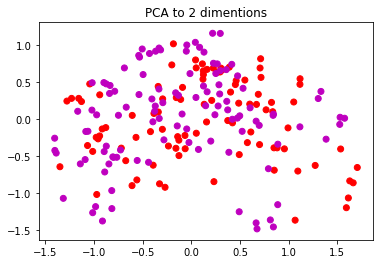

In [62]:
X_proj_2 = u[:,:2].T.dot(X_mean_t) # X_proj_2 is 2Xn
plt.scatter(X_proj_2[0,:] ,X_proj_2[1,:], color = Y);
plt.title("PCA to 2 dimentions");

## 3D Scatter
same as 2D, but we will use 3 components instead of 2.

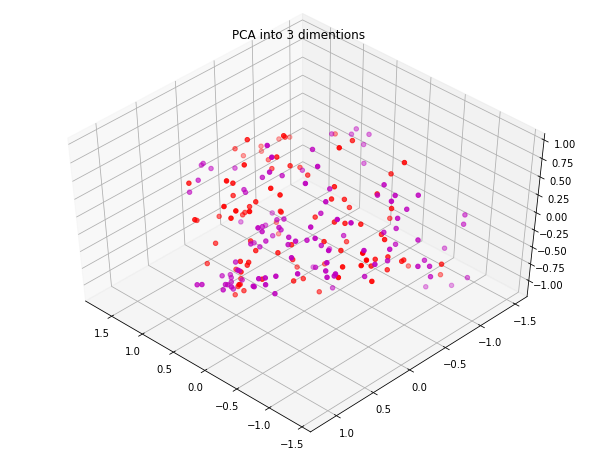

In [63]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=134)
X_proj_3 = u[:,:3].T.dot(X_mean_t)
ax.scatter(X_proj_3[0,:] ,X_proj_3[1,:], X_proj_3[2,:], color = Y, cmap=plt.cm.spectral);
plt.title('PCA into 3 dimentions');

## The Error Curve
we first note that the reconstruction error is denoted by -
$$ err_k =\frac{\|pinv(W_k)*W_k*X-X\|^2}{\|x\|^2} $$
In the class we lwarned that the reconstruction error is denoted by-
$$ 1 - \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{m}\lambda_i} $$
we will use the second option, since it is more elegant.

squared normalized "singular values" of svd, are equals to the normalized eig values.

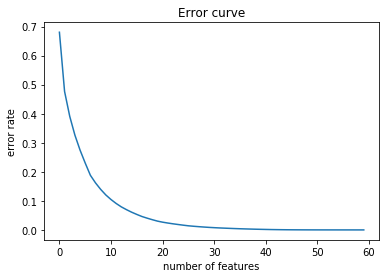

In [64]:
normalized_eig = s**2/np.sum(s**2)
error_curve =1 - np.cumsum(normalized_eig)

plt.plot(error_curve)
plt.title("Error curve")
plt.xlabel("number of features")
plt.ylabel("error rate")

## section f
I assume that by denoting 95% error, you were meant 95% reconstruction, and by 99% error, you meant 1% reconstruction.<br>
we will use argmax, since argmax will stop on the first True.

In [65]:
reconstuction_rate = (1 - error_curve)
rec_95 =  np.argmax(reconstuction_rate >= 0.95) +1
rec_99 =  np.argmax(reconstuction_rate >= 0.99) +1
print "for obtaining 95 reconstruction rate, we should take {} eigen vectors.".format(rec_95)
print "for obtaining 99 reconstruction rate, we should take {} eigen vectors.".format(rec_99)


for obtaining 95 reconstruction rate, we should take 17 eigen vectors.
for obtaining 99 reconstruction rate, we should take 29 eigen vectors.
